In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('admission - admission.csv')

In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,497.000000,497.000000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.370221,3.484909,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.992288,0.925269,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.97000


Text(0, 0.5, 'Frequency')

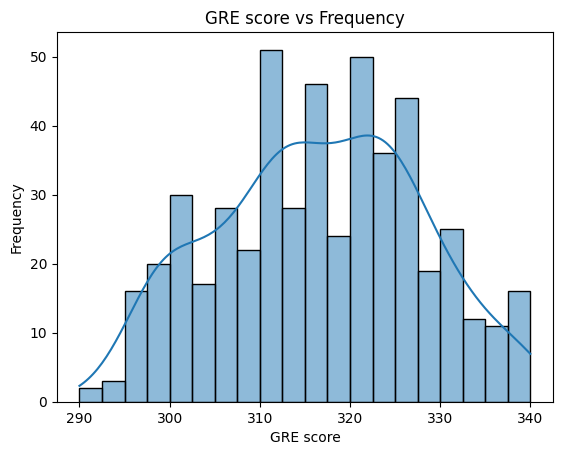

In [4]:
#histogram of GRE score
sns.histplot(data['GRE Score'], bins=20, kde=True)
plt.title('GRE score vs Frequency')
plt.xlabel('GRE score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

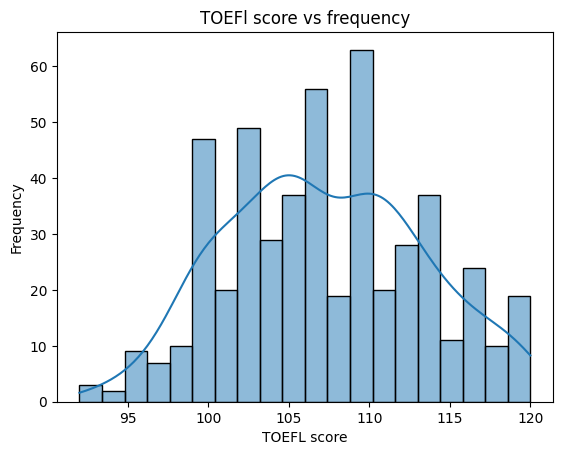

In [5]:
#histogram of TOEFL score
sns.histplot(data['TOEFL Score'], bins=20, kde=True)
plt.title('TOEFl score vs frequency')
plt.xlabel('TOEFL score')
plt.ylabel('Frequency')

In [6]:
#checking null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  3
LOR                  3
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
#filling null values with mean values
data.fillna(data.mean(), inplace=True)

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,3.370221,4.5,9.65,1,0.92
1,2,324,107,4,4.000000,4.5,8.87,1,0.76
2,3,316,104,3,3.000000,3.5,8.00,1,0.72
3,4,322,110,3,3.500000,2.5,8.67,1,0.80
4,5,314,103,2,2.000000,3.0,8.21,0,0.65


In [8]:
#finding duplicate rows
data.duplicated().sum()

np.int64(0)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
#Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Chance of Admit', axis=1)) 


data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)  # One-hot encoding

In [12]:
X=data.drop(columns=['Chance of Admit'])
y=data['Chance of Admit']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
model=RandomForestClassifier(random_state=42)

In [15]:
y_train = pd.cut(y_train, bins=3, labels=['Low', 'Medium', 'High'])
y_test = pd.cut(y_test, bins=3, labels=['Low', 'Medium', 'High'])

In [16]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import classification_report

In [18]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       0.82      0.97      0.89        32
         Low       0.78      0.35      0.48        20
      Medium       0.74      0.81      0.77        48

    accuracy                           0.77       100
   macro avg       0.78      0.71      0.71       100
weighted avg       0.77      0.77      0.75       100

